<a href="https://colab.research.google.com/github/Nik-Kras/Hack-15_Stochastic_Schedule_Optimisation/blob/main/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Measures Dataset I create RandomForest Refressor to predict duration. Then calculating Gini Index I define importance

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [16]:
# Getting data for Hackathon
from google.colab import drive 
import os
drive.mount('/content/drive')
os.chdir('drive/MyDrive/Colab Notebooks/Hackathon: Hack15')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [31]:
MeasureTable = pd.read_csv ('project-1/metrics_numerical.csv')

The plan to create Random Forest Regressor

* Deal with NaN: replace with average values of a column
* Split data 80-20 as training-testing
* Train the model
* Achieve the biggest accuracy by adjusting hyperparameters
* Calculate Gini index

In [32]:
MeasureTable = pd.DataFrame(MeasureTable)
MeasureTable

,P6 ID,Type,Milestone or Activity,Mean Forecasted Duration (Elapsed Days),Likelihood To Meet lanned Duration,Forecast Likelihood,Criticality,Risk Share (%),Duration Contribution,Criticality Float Sensitivity,Risk Influence Score
0,a2fb53a066cb,TASK_DRIVEN,Activity,0.000000,NaN,0.356436,23.0,0.000000,NaN,NaN,0.000000
1,70b3d330f100,TASK_DRIVEN,Activity,54.929799,NaN,0.356436,23.0,0.000000,NaN,-0.003788,0.105720
2,cbc5aa1ab136,TASK_DRIVEN,Activity,30.636038,90.0,0.297030,8.8,0.002040,6.03,-0.124974,0.048773
3,3a8a0be80a14,TASK_DRIVEN,Activity,19.942800,79.0,0.782178,3.2,0.002286,7.69,-0.083573,0.002597
4,667b3111e9d3,TASK_DRIVEN,Activity,22.593316,71.0,0.702970,2.9,0.007285,20.77,-0.174732,0.004504
...,...,...,...,...,...,...,...,...,...,...,...
365,fa55fa33087c,TASK_DRIVEN,Activity,125.934648,NaN,0.435644,7.6,0.000000,NaN,0.014434,0.002270
366,7c16c894bad2,TASK_DRIVEN,Activity,40.649282,NaN,1.000000,0.0,0.000000,NaN,NaN,0.000000
367,5fa83cdda518,FINISH_MILESTONE,Milestone,0.000000,NaN,1.000000,37.4,0.000000,NaN,NaN,NaN
368,88336880adc8,TASK_DRIVEN,Activity,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN


# Preprocessing

In [33]:
MeasureTable.columns

Index(['P6 ID', 'Type', 'Milestone or Activity',
       'Mean Forecasted Duration (Elapsed Days)',
       'Likelihood To Meet lanned Duration', 'Forecast Likelihood',
       'Criticality', 'Risk Share (%)', 'Duration Contribution',
       'Criticality Float Sensitivity', 'Risk Influence Score'],
      dtype='object')

In [34]:
MeasureTable.dropna()

,P6 ID,Type,Milestone or Activity,Mean Forecasted Duration (Elapsed Days),Likelihood To Meet lanned Duration,Forecast Likelihood,Criticality,Risk Share (%),Duration Contribution,Criticality Float Sensitivity,Risk Influence Score
2,cbc5aa1ab136,TASK_DRIVEN,Activity,30.636038,90.0,0.297030,8.8,0.002040,6.03,-0.124974,0.048773
3,3a8a0be80a14,TASK_DRIVEN,Activity,19.942800,79.0,0.782178,3.2,0.002286,7.69,-0.083573,0.002597
4,667b3111e9d3,TASK_DRIVEN,Activity,22.593316,71.0,0.702970,2.9,0.007285,20.77,-0.174732,0.004504
5,f6188b61a6c7,TASK_DRIVEN,Activity,29.291515,95.0,0.346535,0.2,0.001024,3.39,-0.005002,0.013169
6,b9cda54b9c0a,TASK_DRIVEN,Activity,21.345938,62.0,0.207921,0.9,0.007456,18.15,-0.042191,0.011333
...,...,...,...,...,...,...,...,...,...,...,...
349,a7db1f0148ec,TASK_DRIVEN,Activity,6.184137,96.0,0.029703,8.1,0.000194,-9.50,-0.117227,0.002048
350,5a00247eea37,TASK_DRIVEN,Activity,11.776117,64.0,0.356436,0.3,0.002433,3.25,0.007965,0.002174
351,70f2b57a1d49,TASK_DRIVEN,Activity,15.719330,69.0,0.009901,96.5,0.004240,4.26,0.014580,0.189053
354,f0733671e10a,TASK_DRIVEN,Activity,55.957331,42.0,0.168317,2.9,0.020060,69.42,-2.639554,0.024552


First of all I drop a few redundant cols

In [35]:
MeasureTable = MeasureTable.drop(['P6 ID', 'Type', 'Milestone or Activity'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [36]:
MeasureTable.head()

,Mean Forecasted Duration (Elapsed Days),Likelihood To Meet lanned Duration,Forecast Likelihood,Criticality,Risk Share (%),Duration Contribution,Criticality Float Sensitivity,Risk Influence Score
0,0.000000,NaN,0.356436,23.0,0.000000,NaN,NaN,0.000000
1,54.929799,NaN,0.356436,23.0,0.000000,NaN,-0.003788,0.105720
2,30.636038,90.0,0.297030,8.8,0.002040,6.03,-0.124974,0.048773
3,19.942800,79.0,0.782178,3.2,0.002286,7.69,-0.083573,0.002597
4,22.593316,71.0,0.702970,2.9,0.007285,20.77,-0.174732,0.004504


In [22]:
print("The table consist of " + str(MeasureTable.isnull().sum().sum()) + " NaN values")

The table consist of 449 NaN values


That is how I can got mean variables for each col

In [37]:
MeasureTable.mean()

Mean Forecasted Duration (Elapsed Days)    28.055114
Likelihood To Meet lanned Duration         70.464135
Forecast Likelihood                         0.301775
Criticality                                 9.542703
Risk Share (%)                              0.002703
Duration Contribution                      10.656540
Criticality Float Sensitivity              -0.054785
Risk Influence Score                        0.041714
dtype: float64

In [38]:
MeasureTable = MeasureTable.fillna(MeasureTable.mean())
Duration = MeasureTable['Duration Contribution']
MeasureTable = MeasureTable.drop('Duration Contribution', 1)
MeasureTable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Mean Forecasted Duration (Elapsed Days),Likelihood To Meet lanned Duration,Forecast Likelihood,Criticality,Risk Share (%),Criticality Float Sensitivity,Risk Influence Score
0,0.000000,70.464135,0.356436,23.0,0.000000,-0.054785,0.000000
1,54.929799,70.464135,0.356436,23.0,0.000000,-0.003788,0.105720
2,30.636038,90.000000,0.297030,8.8,0.002040,-0.124974,0.048773
3,19.942800,79.000000,0.782178,3.2,0.002286,-0.083573,0.002597
4,22.593316,71.000000,0.702970,2.9,0.007285,-0.174732,0.004504
...,...,...,...,...,...,...,...
365,125.934648,70.464135,0.435644,7.6,0.000000,0.014434,0.002270
366,40.649282,70.464135,1.000000,0.0,0.000000,-0.054785,0.000000
367,0.000000,70.464135,1.000000,37.4,0.000000,-0.054785,0.041714
368,28.055114,70.464135,0.301775,0.0,0.000000,-0.054785,0.041714


In [25]:
Duration

0      10.65654
1      10.65654
2       6.03000
3       7.69000
4      20.77000
         ...   
365    10.65654
366    10.65654
367    10.65654
368    10.65654
369    10.65654
Name: Duration Contribution, Length: 370, dtype: float64

In [39]:
print("The table consist of " + str(MeasureTable.isnull().sum().sum()) + " NaN values")

The table consist of 0 NaN values


# Split data to Train and Test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(MeasureTable, Duration, test_size=0.2, random_state=42)

# Train Random Forest

In [41]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

# Optimization section for Random forest:

# Feature Importance evaluation

In [43]:
rf.feature_importances_

array([0.07722294, 0.10790832, 0.01160213, 0.01087462, 0.75226428,
       0.02468631, 0.01544139])

Text(0.5, 0, 'Feature Importance')

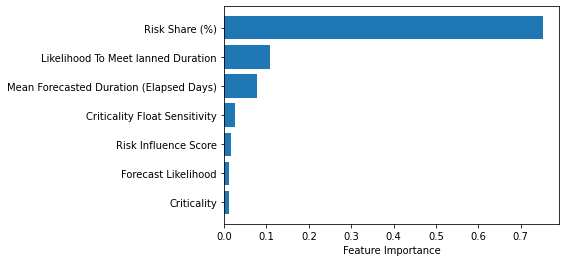

In [45]:
sort = rf.feature_importances_.argsort()
plt.barh(MeasureTable.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")